# Exploratory Analysis on MRI Data

### Task 1: Installation and setup

In [2]:
import nibabel as nb
import SimpleITK as sitk

print(sitk.Version())

SimpleITK Version: 0.10.0 (ITK 4.10)
Compiled: Aug 16 2016 17:21:32



In [3]:
img = nb.load('sample_image.nii')
data = img.get_data()

### Task 2: Preliminary data manipulation

In [4]:
#data.shape shows the x,y,z coordinates and the intensity value
data.shape

(161, 191, 151, 1)

In [5]:
import numpy as np

np.histogram(data)

(array([3086433,   36103,   52393,   69925,  124930,  267260,  355178,
         278078,  255667,  117434]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]))

### Task 3: Rudimentary visualization

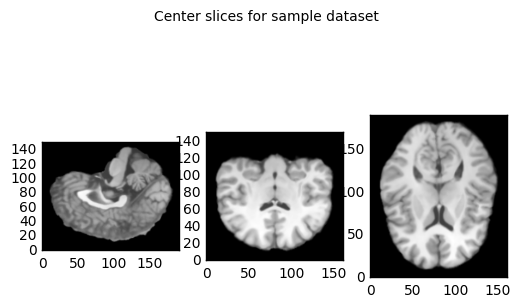

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")
    
slice_0 = data[80, :, :, 0]
slice_1 = data[:, 95, :, 0]
slice_2 = data[:, :, 75, 0]

show_slices([slice_0, slice_1, slice_2])

plt.suptitle("Center slices for sample dataset")

### Task 4: Playing around with affine

In [9]:
np.set_printoptions(precision=3, suppress=True)
img.affine

array([[ -1.,   0.,  -0.,  80.],
       [  0.,  -1.,  -0.,  80.],
       [  0.,   0.,  -1.,  85.],
       [  0.,   0.,   0.,   1.]])

In [10]:
M = img.affine[:3, :3]
abc = img.affine[:3, 3]

In [11]:
def f(i, j, k):
    """ Return X, Y, Z coordinates for i, j, k """
    return M.dot([i, j, k]) + abc

In [14]:
vox_center = (np.array(data.shape) - 1) / 2.
f(vox_center[0], vox_center[1], vox_center[2])

array([  0., -15.,  10.])

Task 5: ITK-Snap output

![ITK Snap](https://github.com/mchl02/NeuroExploration/blob/master/itksnap.png?raw=true)